In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from src import utils_knn, utils_knn_2, utils_ald

In [2]:
data = pd.read_csv('data/athlete_cleaned.csv')
data_short = pd.read_csv('data/athlete_cleaned_short.csv')

In [3]:
data

,gender,event,medal,type,year,country,abb,athlete
0,Men,Double FITA Round Amputee,Gold,Archery,1980,Denmark,DEN,LARSEN Finn
1,Men,Double FITA Round Paraplegic,Gold,Archery,1980,FR Germany,FRG,GEISS H.
2,Men,Double FITA Round Tetraplegic,Gold,Archery,1980,Canada,CAN,PARKER T.
3,Men,Double FITA Round Novice Paraplegic,Gold,Archery,1980,Mexico,MEX,CHAVEZ Alfredo
4,Men,Double FITA Round Novice Tetraplegic,Gold,Archery,1980,Finland,FIN,KARKAINEN K.
...,...,...,...,...,...,...,...,...
19542,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,DE ALMEIDA SILVA Nurya
19543,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,DE OLIVEIRA DIAS Edwarda
19544,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,MARIA LEIRIA DE CASTRO Camila
19545,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,PEREIRA Pamela


In [4]:
data_coor = pd.read_csv('data/country_coordinates.csv')

In [5]:
data_coor

,country,longitude,latitude
0,FR Germany,10.451526,51.165691
1,Sweden,18.643501,60.128161
2,Belgium,4.469936,50.503887
3,Great Britain,-3.435973,55.378051
4,Netherlands,5.291266,52.132633
...,...,...,...
111,Syria,38.996815,34.802075
112,Kazakhstan,66.923684,48.019573
113,Faroe Islands,-6.911806,61.892635
114,Peru,-75.015152,-9.189967


In [6]:
data_full = pd.read_csv('data/data_full.csv')

In [7]:
data_full

,gender,medal,type,year,country,abb,longitude,latitude
0,Men,Gold,Archery,1980,Denmark,DEN,9.501785,56.263920
1,Men,Silver,Archery,1980,FR Germany,FRG,10.451526,51.165691
2,Men,Bronze,Archery,1980,Japan,JPN,138.252924,36.204824
3,Men,Gold,Archery,1980,FR Germany,FRG,10.451526,51.165691
4,Men,Silver,Archery,1980,Belgium,BEL,4.469936,50.503887
...,...,...,...,...,...,...,...,...
19440,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19441,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19442,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19443,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004


In [8]:
def select_sport(data, sport_name):
    return data[data['type'] == sport_name]


data_by_sport = []
data_full['type'].unique()

array(['Archery', 'Athletics', 'Basketball', 'Fencing', 'Powerlifting',
       'Rugby', 'Swimming', 'Table Tennis', 'Wheelchair Tennis',
       'Triathlon', 'Volleyball'], dtype=object)

In [9]:
data_by_sport.append(select_sport(data_full, "Archery"))
len(data_by_sport[-1])

401

In [10]:
data_by_sport.append(select_sport(data_full, "Athletics"))
data_by_sport[-1]['year'].unique()

array([1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
      dtype=int64)

In [11]:
data_by_sport.append(select_sport(data_full, "Basketball"))
len(data_by_sport[-1])

594

In [12]:
data_by_sport.append(select_sport(data_full, "Fencing"))
len(data_by_sport[-1])

665

In [13]:
data_by_sport.append(select_sport(data_full, "Powerlifting"))
len(data_by_sport[-1])

403

In [14]:
data_by_sport.append(select_sport(data_full, "Rugby"))
len(data_by_sport[-1])

173

In [15]:
data_by_sport.append(select_sport(data_full, "Table Tennis"))
len(data_by_sport[-1]), data_by_sport[-1]["year"].unique()

(1383,
 array([1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
       dtype=int64))

In [16]:
data_by_sport.append(select_sport(data_full, "Wheelchair Tennis"))
len(data_by_sport[-1]), data_by_sport[-1]["year"].unique()

(1360,
 array([1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
       dtype=int64))

In [17]:
data_by_sport.append(select_sport(data_full, "Swimming"))
len(data_by_sport[-1])

6188

In [18]:
data_by_sport.append(select_sport(data_full, "Triathlon"))
len(data_by_sport[-1])

18

In [19]:
data_by_sport.append(select_sport(data_full, "Volleyball"))
len(data_by_sport[-1])

575

In [20]:
data_by_sport

[    gender   medal     type  year     country  abb   longitude   latitude
 0      Men    Gold  Archery  1980     Denmark  DEN    9.501785  56.263920
 1      Men  Silver  Archery  1980  FR Germany  FRG   10.451526  51.165691
 2      Men  Bronze  Archery  1980       Japan  JPN  138.252924  36.204824
 3      Men    Gold  Archery  1980  FR Germany  FRG   10.451526  51.165691
 4      Men  Silver  Archery  1980     Belgium  BEL    4.469936  50.503887
 ..     ...     ...      ...   ...         ...  ...         ...        ...
 396  Mixed    Gold  Archery  2016       China  CHN  104.195397  35.861660
 397  Mixed  Silver  Archery  2016        Iran  IRI   53.688046  32.427908
 398  Mixed  Silver  Archery  2016        Iran  IRI   53.688046  32.427908
 399  Mixed  Bronze  Archery  2016       Italy  ITA   12.567380  41.871940
 400  Mixed  Bronze  Archery  2016       Italy  ITA   12.567380  41.871940
 
 [401 rows x 8 columns],
      gender   medal       type  year      country  abb   longitude   lat

In [21]:
data_archery = data_by_sport[0]
data_archery

,gender,medal,type,year,country,abb,longitude,latitude
0,Men,Gold,Archery,1980,Denmark,DEN,9.501785,56.263920
1,Men,Silver,Archery,1980,FR Germany,FRG,10.451526,51.165691
2,Men,Bronze,Archery,1980,Japan,JPN,138.252924,36.204824
3,Men,Gold,Archery,1980,FR Germany,FRG,10.451526,51.165691
4,Men,Silver,Archery,1980,Belgium,BEL,4.469936,50.503887
...,...,...,...,...,...,...,...,...
396,Mixed,Gold,Archery,2016,China,CHN,104.195397,35.861660
397,Mixed,Silver,Archery,2016,Iran,IRI,53.688046,32.427908
398,Mixed,Silver,Archery,2016,Iran,IRI,53.688046,32.427908
399,Mixed,Bronze,Archery,2016,Italy,ITA,12.567380,41.871940


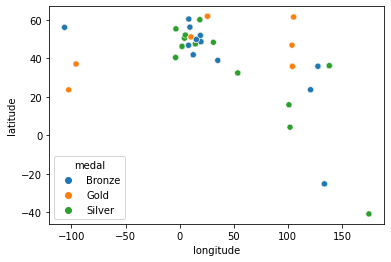

In [22]:
cls_archery = KNeighborsClassifier(n_neighbors=10)
X_archery = pd.DataFrame()
X_archery['longitude'] = data_archery['longitude']
X_archery['latitude'] = data_archery['latitude']
y_archery = data_archery['medal']
utils_knn.plot_clustering(X_archery, y_archery)
plt.savefig("new images/D=02_KNeighborsClassifier_medal_by_longlat")

In [23]:
X_archery_train, X_archery_val, y_archery_train, y_archery_val = train_test_split(X_archery, y_archery, train_size=0.66)
cls_archery.fit(X_archery_train, y_archery_train) # len(X_archery_train ) = 0.8 * len(X_archery)
labels = cls_archery.predict(X_archery_val)
right = 0
false = 0
print(y_archery_val)
a = y_archery_val.tolist()
y_archery_val_cpy = []
for i in range(len(labels)):
    if labels[i] ==  a[i]:
        right += 1
    else:
        false += 1
print('eff = ', right , false)

173    Silver
17     Bronze
381    Silver
27       Gold
298    Bronze
        ...  
108    Silver
124    Bronze
396      Gold
66       Gold
194      Gold
Name: medal, Length: 137, dtype: object
eff =  59 78


In [24]:
data_athletics = data_by_sport[1]
data_athletics

,gender,medal,type,year,country,abb,longitude,latitude
401,Men,Gold,Athletics,1980,Mexico,MEX,-102.552784,23.634501
402,Men,Silver,Athletics,1980,Canada,CAN,-106.346771,56.130366
403,Men,Bronze,Athletics,1980,Switzerland,SUI,8.227512,46.818188
404,Men,Gold,Athletics,1980,Sweden,SWE,18.643501,60.128161
405,Men,Silver,Athletics,1980,Mexico,MEX,-102.552784,23.634501
...,...,...,...,...,...,...,...,...
8081,Women,Gold,Athletics,2016,China,CHN,104.195397,35.861660
8082,Women,Silver,Athletics,2016,Australia,AUS,133.775136,-25.274398
8083,Women,Silver,Athletics,2016,Australia,AUS,133.775136,-25.274398
8084,Women,Silver,Athletics,2016,Australia,AUS,133.775136,-25.274398


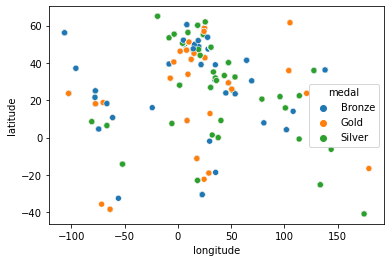

In [25]:
cls_athletics = KNeighborsClassifier(n_neighbors=3)
X_athletics = pd.DataFrame()
X_athletics['longitude'] = data_athletics['longitude']
X_athletics['latitude'] = data_athletics['latitude']
y_athletics = data_athletics['medal']
utils_knn.plot_clustering(X_athletics, y_athletics)
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_medal_by_longlat")

In [26]:
X_athletics_train, X_athletics_val, y_athletics_train, y_athletics_val = train_test_split(X_athletics, y_athletics, train_size=0.66)
cls_athletics.fit(X_athletics_train, y_athletics_train) 
labels_athletics = cls_athletics.predict(X_athletics_val)
right = 0
false = 0
print(y_athletics_val)
a = y_athletics_val.tolist()
y_athletics_val_cpy = []
for i in range(len(labels_athletics)):
    if labels_athletics[i] ==  a[i]:
        right += 1
    else:
        false += 1
print('eff = ', right , false)

3355    Silver
3281    Bronze
6962    Silver
6159      Gold
5450      Gold
         ...  
846       Gold
407       Gold
6930    Bronze
5046    Silver
6934      Gold
Name: medal, Length: 2613, dtype: object
eff =  862 1751


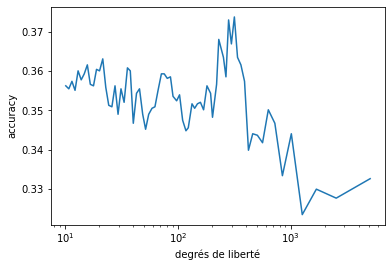

In [27]:
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
gen = utils_knn_2.knn_simple_validation(X_athletics_train, y_athletics_train, X_athletics_val, y_athletics_val, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
sp = sns.lineplot(x="degrés de liberté", y="accuracy", data=df)
sp.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_medal_by_longlat_accuracy")

In [28]:
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

16

In [29]:
data_athletics = pd.read_csv('data/medal_country_year_athletics.csv')
data_athletics

,year,country,longitude,latitude,value
0,0.0,Denmark,9.501785,56.263920,S
1,0.0,FR Germany,10.451526,51.165691,G
2,0.0,Canada,-106.346771,56.130366,G
3,0.0,Mexico,-102.552784,23.634501,G
4,0.0,Finland,25.748151,61.924110,S
...,...,...,...,...,...
1135,1.8,Mozambique,35.529562,-18.665695,B
1136,1.8,Libya,17.228331,26.335100,0
1137,1.8,Philippines,121.774017,12.879721,0
1138,1.8,Laos,102.495496,19.856270,0


In [30]:
def calculer_distance(longitudeA,latitudeA,yearA,longitudeB,latitudeB,yearB):
    K = 1
    result = sqrt((longitudeA-longitudeB)^2 + (latitudeA-latitudeB)^2) + K * abs(yearA-yearB)
    return result

In [31]:
cls_atlhetics = KNeighborsClassifier(n_neighbors=5)
X_athletics = pd.DataFrame()
X_athletics['longitude'] = data_athletics['longitude']
X_athletics['latitude'] = data_athletics['latitude']
X_athletics['year'] = data_athletics['year']
y_athletics = data_athletics['value']

In [32]:
X_athletics_train, X_athletics_val, y_athletics_train, y_athletics_val = train_test_split(X_athletics, y_athletics, train_size=0.66)
cls_athletics.fit(X_athletics_train, y_athletics_train) 
labels_athletics = cls_athletics.predict(X_athletics_val)
right = 0
false = 0
a = y_athletics_val.tolist()
y_athletics_val_cpy = []
for i in range(len(labels_athletics)):
    if labels_athletics[i] ==  a[i]:
        right += 1
    else:
        false += 1
print('eff = ', right , false)

eff =  221 167


In [33]:
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
gen = utils_knn_2.knn_simple_validation(X_athletics_train, y_athletics_train, X_athletics_val, y_athletics_val, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])


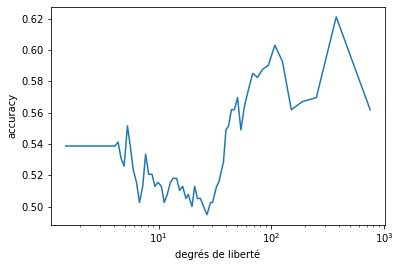

In [34]:
sp1 = sns.lineplot(x="degrés de liberté", y="accuracy", data=df)
sp1.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_medal_by_longlat_accuracy_2")

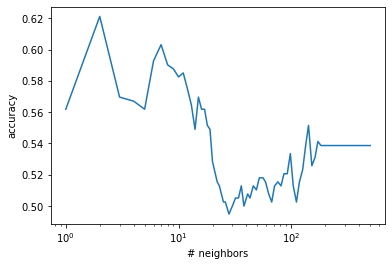

In [35]:
sp2 = sns.lineplot(x="# neighbors", y="accuracy", data=df)
sp2.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_medal_by_longlat_accuracy_3")

In [36]:
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\A

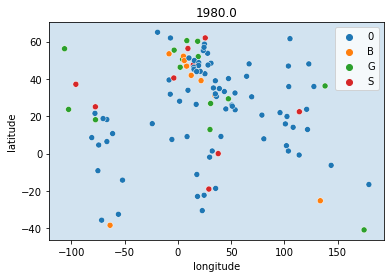

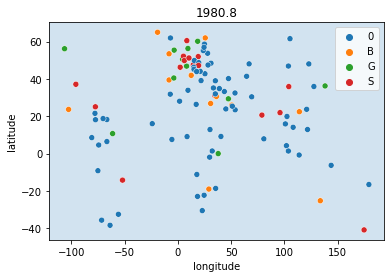

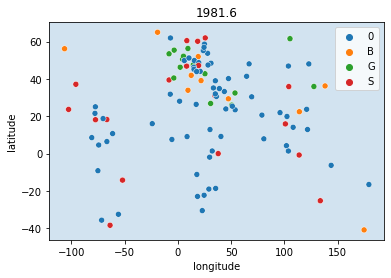

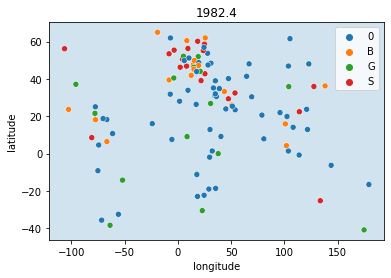

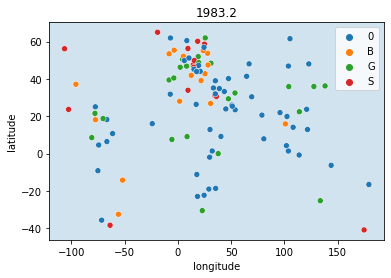

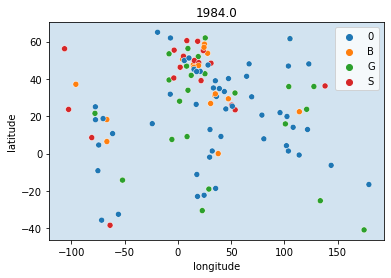

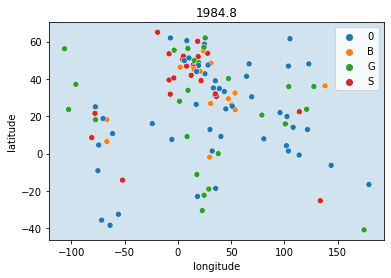

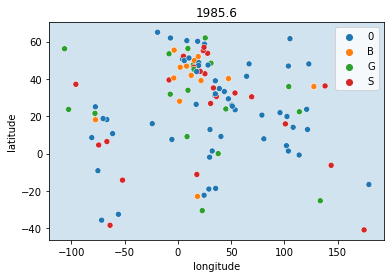

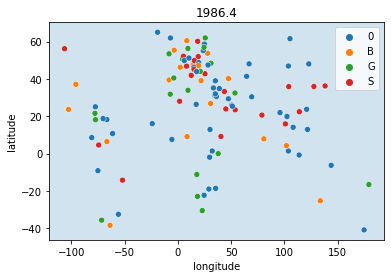

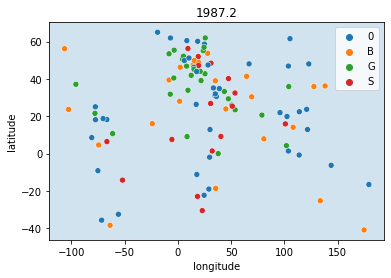

In [37]:
cls = KNeighborsClassifier(n_neighbors=100)
c=1
for year in data_athletics["year"].unique():
    plt.figure(c)
    plt.subplot().set_title(year*4 + 1980)
    x_visual = pd.DataFrame()
    data_year = data_athletics[data_athletics["year"] == year]
    
    x_visual['longitude'] = data_year['longitude']
    x_visual['latitude'] = data_year['latitude']
    y_visual = data_year['value']
    cls.fit(x_visual, y_visual)
    utils_knn.plot_clustering(x_visual, y_visual)
    utils_ald.add_decision_boundary(cls)
    c += 1
    name = "new images/D=02_Athletics_KNeighborsClassifier_medal_by_longlat_" + str(year)

In [38]:
train_size = 0.90
n_splits = 10
gen = utils_knn_2.knn_multiple_validation(X_athletics, y_athletics, n_splits, train_size, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

8

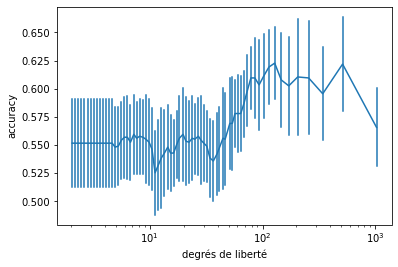

In [39]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_knn_multiple_validation_medal_by_longlat_accuracy_1")

In [40]:
n_folds = 10
gen = utils_knn_2.knn_cross_validation(X_athletics, y_athletics, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

2

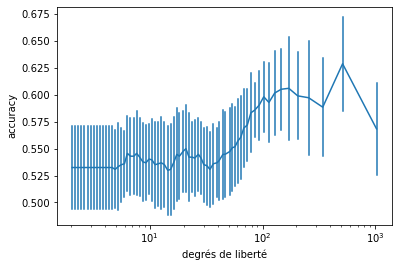

In [41]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_knn_cross_validation_medal_by_longlat_accuracy_2")

In [42]:
from sklearn.model_selection import cross_val_score
n_folds = 10
gen = utils_knn_2.knn_cross_validation2(X_athletics, y_athletics, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt


2

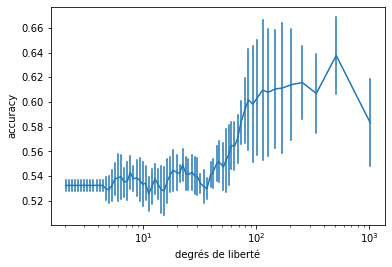

In [43]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/D=02_Athletics_KNeighborsClassifier_knn_cross_validation2_medal_by_longlat_accuracy_1")